<a href="https://colab.research.google.com/github/arupmondalds/RapidMiner_PoC/blob/main/IRIS_Simulation_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# List all uploaded files
for file_name in uploaded.keys():
    print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')

# Read the uploaded file into a df_initialFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the df_initialFrame
print(data.head())

Saving CustomerData.csv to CustomerData.csv
User uploaded file "CustomerData.csv" with length 4013535 bytes
     Id   age           job  marital  education default  balance housing loan  \
0  1001   NaN    management  married   tertiary      no   2143.0     yes   no   
1  1002   NaN           NaN   single  secondary      no     29.0     yes   no   
2  1003   NaN  entrepreneur  married  secondary      no      2.0     yes  yes   
3  1004  47.0   blue-collar  married    unknown      no   1506.0     yes   no   
4  1005  33.0       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198    

Initial dataset shape: (45211, 18)
Unique values in 'job' column before cleanup:
['management' nan 'entrepreneur' 'blue-collar' 'unknown' 'retired'
 'technician' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Number of NaNs in 'job' column before cleanup: 1
Dataset shape after imputing missing values: (45211, 18)
Dataset shape after converting target variable and dropping NaNs: (45211, 18)
NaNs after initial cleanup:
Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Dataset shape after cleaning outliers: (28067, 18)
Shape of cleaned data: (28067, 18)
     Id   age           job  marital  education default  balance housing loan  \
0  1001  39.0    management  married   tertiary      no   2143.0     yes   no   
1  1002  39.0   blue-c

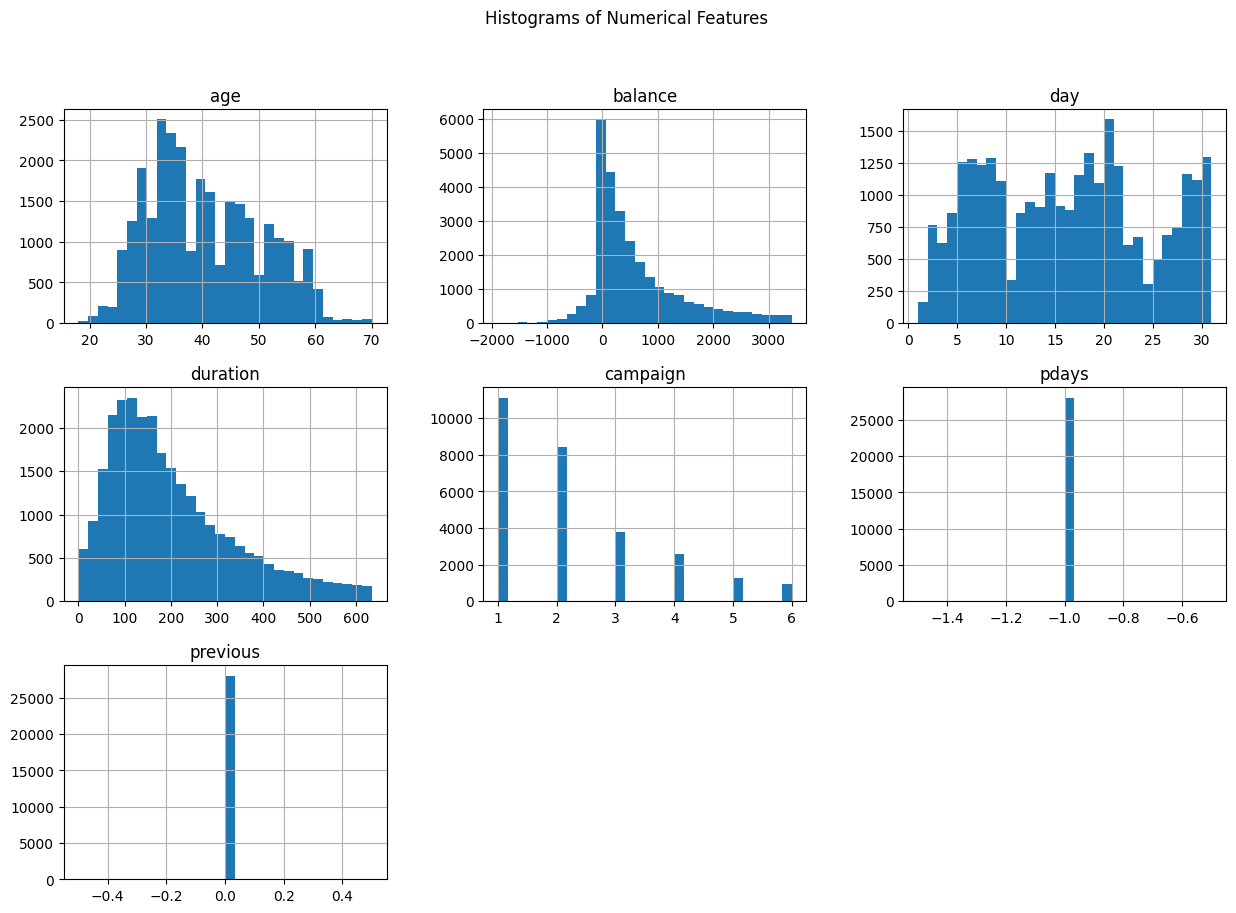

Checking for categorical columns before encoding:
Column 'job' has 0 missing values
Column 'marital' has 0 missing values
Column 'education' has 0 missing values
Column 'default' has 0 missing values
Column 'housing' has 0 missing values
Column 'loan' has 0 missing values
Column 'contact' has 0 missing values
Column 'month' has 0 missing values
Column 'poutcome' has 0 missing values
NaNs in encoded data:
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb        

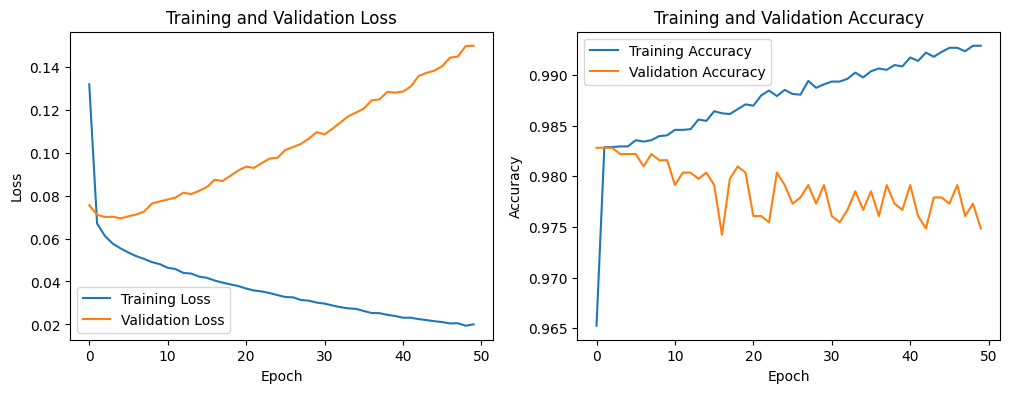

128/128 [==============================] - 0s 1ms/step


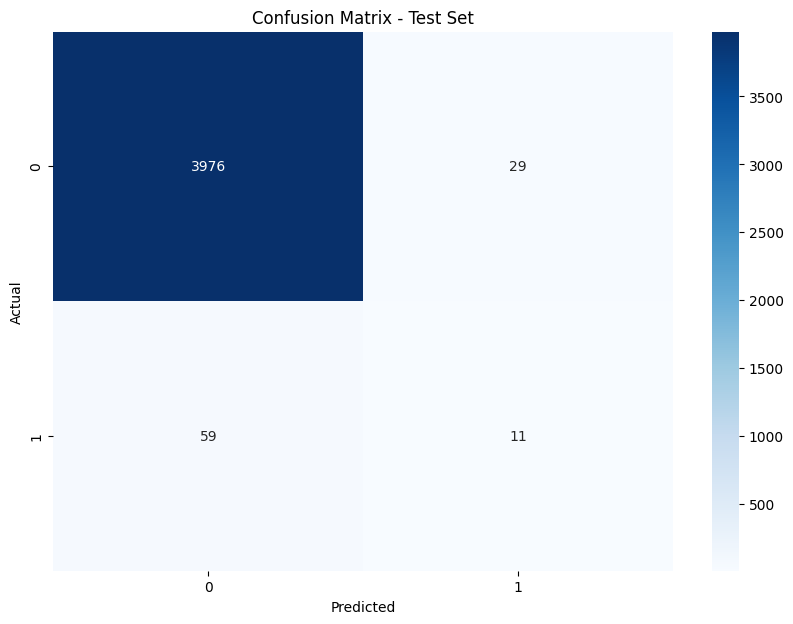

Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4005
         1.0       0.28      0.16      0.20        70

    accuracy                           0.98      4075
   macro avg       0.63      0.57      0.59      4075
weighted avg       0.97      0.98      0.98      4075

Accuracy: 0.9784
Precision: 0.2750
Recall: 0.1571
F1 Score: 0.2000


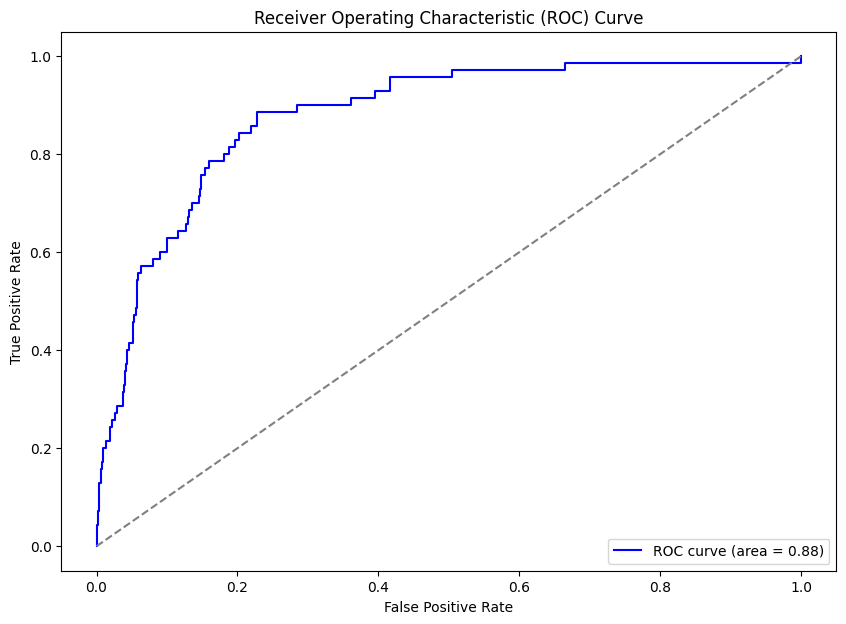

In [3]:
# Initial check of dataset shape
print("Initial dataset shape:", data.shape)

# Data Cleanup
# Check the unique values in the 'job' column and the number of NaNs
print("Unique values in 'job' column before cleanup:")
print(data['job'].unique())
print("Number of NaNs in 'job' column before cleanup:", data['job'].isna().sum())

# Impute missing values
data['age'].fillna(data['age'].median(), inplace=True)

# Check if 'job' column has NaNs and calculate the mode correctly
if 'job' in data.columns:
    job_mode = data['job'].mode()
    if not job_mode.empty:
        data['job'].fillna(job_mode[0], inplace=True)

data['balance'].fillna(data['balance'].median(), inplace=True)

# Check dataset shape after imputing missing values
print("Dataset shape after imputing missing values:", data.shape)

# Convert 'y' to binary values
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Drop rows where target variable 'y' is NaN
data = data.dropna(subset=['y'])

# Check dataset shape after converting target variable and dropping NaNs
print("Dataset shape after converting target variable and dropping NaNs:", data.shape)

# Debugging: Check for NaNs in the dataset
print("NaNs after initial cleanup:")
print(data.isnull().sum())

# Clean data from outliers
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
def detect_and_clean_outliers(data, numerical_columns):
    data_cleaned = data.copy()
    for column in numerical_columns:
        Q1 = data_cleaned[column].quantile(0.25)
        Q3 = data_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]
    return data_cleaned

cleaned_data = detect_and_clean_outliers(data, numerical_columns)

# Check dataset shape after cleaning outliers
print("Dataset shape after cleaning outliers:", cleaned_data.shape)

# Debugging: Check the shape of the cleaned data
print("Shape of cleaned data:", cleaned_data.shape)
print(cleaned_data.head())

# Display cleaned data graphically
def plot_cleaned_data(data, numerical_columns):
    data[numerical_columns].hist(bins=30, figsize=(15, 10))
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

plot_cleaned_data(cleaned_data, numerical_columns)

# Ensure there are no empty columns before encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
print("Checking for categorical columns before encoding:")
for col in categorical_columns:
    if col not in cleaned_data.columns:
        print(f"Column '{col}' is missing!")
    else:
        print(f"Column '{col}' has {cleaned_data[col].isnull().sum()} missing values")

# One-hot encode categorical variables
if not cleaned_data.empty:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = pd.DataFrame(encoder.fit_transform(cleaned_data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
else:
    raise ValueError("The cleaned dataset is empty after preprocessing steps.")

# Debugging: Check for NaNs in the encoded data
print("NaNs in encoded data:")
print(encoded_data.isnull().sum())

# Merge encoded columns with the rest of the data
cleaned_data = cleaned_data.drop(columns=categorical_columns)
cleaned_data = pd.concat([cleaned_data, encoded_data], axis=1)

# Ensure no NaNs in the dataset after encoding
cleaned_data = cleaned_data.dropna()

# Debugging: Check for NaNs in the final cleaned data
print("NaNs in final cleaned data:")
print(cleaned_data.isnull().sum())

# Check if cleaned_data is empty
if cleaned_data.empty:
    raise ValueError("The cleaned dataset is empty after preprocessing steps.")

# Split the cleaned data into training, validation, and test sets
def split_data(data, target_column, test_size=0.2, val_size=0.1, random_state=42):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size, stratify=y_train_val, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data(cleaned_data, target_column='y')

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network model
def build_neural_network(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_train.shape[1]
nn_model = build_neural_network(input_dim)

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Visualize training process
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)

# Evaluate the model on test data
y_test_pred = nn_model.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_class)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Classification Report
print("Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred_class))

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
